**サポートベクターマシンのモデル構築例**

サポートベクターマシン（Support Vector Machine）はカテゴリを識別するための境界線をマージンが最大になるように引く手法です。

※下の図の破線部分が最大になるように境界線を引く

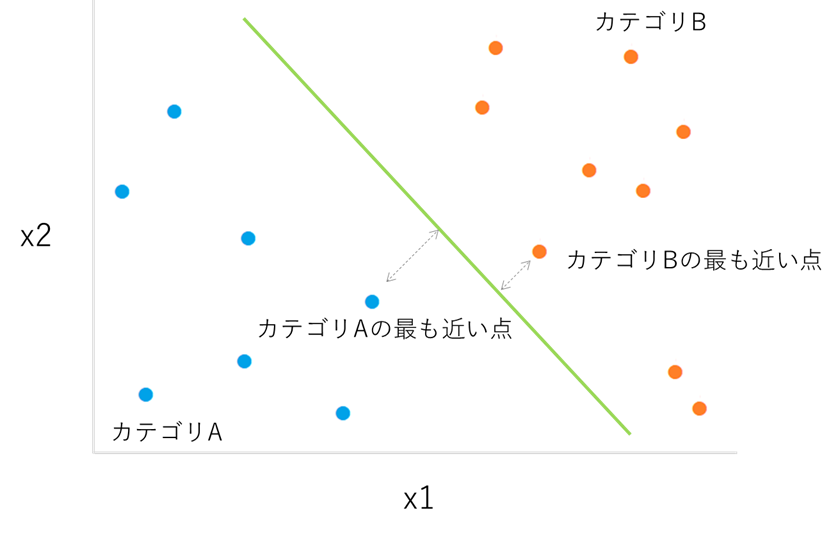


In [ ]:
# pandasのライブラリ
import pandas as pd
# 機械学習ライブラリ
import sklearn

# SVMのライブラリを読み込む
from sklearn.svm import LinearSVC

# データの読み込み
cancer = pd.read_csv('cancerdata-Nanなし.csv')

# データのデータ内容を確認
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


このデータセットでは、「diagnosis（診断結果）」が**目的変数**です。

1 :「悪性」
0 :「良性」

説明変数の内容は、以下サイトに記載されていますので、気になる人はチェックしてみましょう

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv

In [ ]:
# データセット全体の欠損数を確認する
print('データの欠損数:',cancer.isnull().sum().sum())

データの欠損数: 0


In [ ]:
# SVMのライブラリの読み込み
from sklearn.svm import LinearSVC
# 学習データとテストデータを分けるライブラリの読み込み
from sklearn.model_selection import train_test_split

# yに目的変数：「diagnosis」の列を代入する
y = cancer['diagnosis']
# yに何が入っているか確認する
y

0      1
1      1
2      1
3      1
4      1
      ..
545    0
546    0
547    0
548    0
549    0
Name: diagnosis, Length: 550, dtype: int64

In [ ]:
# Xに説明変数の列を代入する
#  以下は「diagnosis」列を削除して、それ以外のデータをyに代入している axis=1→列方向
X = cancer.drop(['diagnosis'], axis=1)

# Xに何が入っているか確認
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# 学習データとテストデータに分割する
# test_size = 0.3 ,random_state = 10 とする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [ ]:
# モデルの初期化、学習を行う(8)
model = LinearSVC()

# 学習データを使った学習（ fit : trainデータを使って、学習）
model.fit(X_train, y_train)


trainscore = model.score(X_train, y_train)
# 作成したモデルに対し、訓練データを使って精度を確かめる
test_score = model.score(X_test, y_test)

print('学習データの学習結果：',trainscore)
print('テストデータの学習結果：',test_score)

学習データの学習結果： 0.9246753246753247
テストデータの学習結果： 0.9333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


これで初めての SVM の機械学習モデルができました！

未知のデータで予測してみましょう。

sklearn は、fit で学習、 predict で予測ができます。

In [ ]:
# 未知のデータで予測してみる

# データの読み込み→
pred = pd.read_csv('predict.csv')

# データのデータ内容を確認
pred.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.860,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,0.05948,0.3163,1.304,2.115,20.67,0.009579,0.01104,0.00000,0.000000,0.03004,0.002228,11.660,24.77,74.08,412.3,0.1001,0.07348,0.00000,0.00000,0.2458,0.06592
1,11.130,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,0.06552,0.2800,1.467,1.994,17.85,0.003495,0.03051,0.03445,0.010240,0.02912,0.004723,12.020,28.26,77.80,436.6,0.1087,0.17820,0.15640,0.06413,0.3169,0.08032
2,12.770,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,0.1539,0.05637,0.2409,1.367,1.477,18.76,0.008835,0.01233,0.01328,0.009305,0.01897,0.001726,13.870,36.00,88.10,594.7,0.1234,0.10640,0.08653,0.06498,0.2407,0.06484
3,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.01282,0.1692,0.06576,0.3013,1.879,2.121,17.86,0.010940,0.01834,0.03996,0.012820,0.03759,0.004623,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393
4,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,0.2116,1.360,1.502,16.83,0.008412,0.02153,0.03898,0.007620,0.01695,0.002801,13.890,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242


In [ ]:
# pred を対象に、「predict」する
result = model.predict(pred)

# result に入っているリストの値が、予測値です！ 0番目データの予測値は 0 という意味です！
result 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0])